In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from wandb import sklearn

# Data understanding

## Gathering data

In [2]:
url = "https://github.com/dicodingacademy/dicoding_dataset/blob/main/employee/employee_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


#### Insight data

is got 34 columns as follows:

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

## Assessing data

### Check many data

In [3]:
print(f"many data:{len(df)}")

many data:1470


### Check type data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#### Insight
Is got anomalie data type which must isn't happened
* **EmployeeID** - string


### Check missing value

In [5]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

#### Insight
Obtained 412 null data in the Attrition column

### Check duplicate data

In [6]:
df.duplicated().sum()

0

#### Insight
Is not got duplicate data

### Check value unique

In [7]:
print(df["BusinessTravel"].value_counts())

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


In [8]:
print(df["Department"].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [9]:
print(df["EducationField"].value_counts())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [10]:
print(df["Gender"].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


In [11]:
print(df["JobRole"].value_counts())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [12]:
print(df["MaritalStatus"].value_counts())

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [13]:
print(df["Over18"].value_counts())

Over18
Y    1470
Name: count, dtype: int64


In [14]:
print(df["OverTime"].value_counts())

OverTime
No     1054
Yes     416
Name: count, dtype: int64


#### Insight
all columns categorical will be changed into numerical
* **BusinessTravel**
* **Departement**
* **EducationField**
* **Gender**
* **JobRole**
* **MaritalStatus**
* **Over18**
* **OverTime**

## Cleaning data

### To change type date
change type data to column which has been done assessing data

In [15]:
df.rename(columns={"EmployeeId" : "EmployeId"}, inplace=True)
df["EmployeId"] = df["EmployeId"].astype(str)


In [16]:
df.head()

,EmployeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### To change columns categorical to numeric
changing columns categorical faceilitate for getting feature

In [17]:
df_pre = df.copy()
df_pre.drop("EmployeId", axis=1, inplace=True)

for column in df_pre.columns:
    if df_pre[column].dtype == "object":
        df_pre[column] = df_pre[column].astype("category")
        df_pre[column] = df_pre[column].cat.codes

In [18]:
df_pre.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,NaN,1,1444,0,1,4,4,1,4,...,2,80,1,7,2,3,6,2,1,2
1,37,1.0,2,1141,1,11,2,3,1,1,...,1,80,0,15,2,1,1,0,0,0
2,51,1.0,2,1323,1,4,4,1,1,1,...,3,80,3,18,2,4,10,0,2,7
3,42,0.0,1,555,2,26,3,2,1,3,...,4,80,1,23,2,4,20,4,4,8
4,40,NaN,2,1194,1,2,4,3,1,3,...,2,80,3,20,2,3,5,3,0,2


In [19]:
print(df_pre["BusinessTravel"].value_counts())

BusinessTravel
2    1043
1     277
0     150
Name: count, dtype: int64


In [20]:
print(df_pre["Department"].value_counts())

Department
1    961
2    446
0     63
Name: count, dtype: int64


In [21]:
print(df_pre["EducationField"].value_counts())

EducationField
1    606
3    464
2    159
5    132
4     82
0     27
Name: count, dtype: int64


In [22]:
print(df_pre["Gender"].value_counts())

Gender
1    882
0    588
Name: count, dtype: int64


In [23]:
print(df_pre["JobRole"].value_counts())

JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64


In [24]:
print(df_pre["MaritalStatus"].value_counts())

MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64


In [25]:
print(df_pre["Over18"].value_counts())

Over18
0    1470
Name: count, dtype: int64


In [26]:
print(df_pre["OverTime"].value_counts())

OverTime
0    1054
1     416
Name: count, dtype: int64


#### Insight
explaining columns which are done changing:
1. BusinessTravel - 0-Non-Travel, 1-Travel_Frequently, 2-Travel_Rarely
2. Department - 0-Human Resources, 1-Research & Development, 2-sales
3. EducationField - 0-Human Resources, 1-Life Sciences, 2-Marketing, 3-Medical, 4-Other, 5-Technical Degree
4. Gender - 0-Female, 1-Male
5. JobRole - 0-Healthcare Representative, 1-Human Resource, 2-Laboratory Technician, 3-Manager, 4-Manufacuring Director,5-Research Director, 6-Research Scientist, 7-Sales Excutive, 8-Sales Representative
6. MaritalStatus - 0-Divorced, 1-Married, 2-single
7. Over18 - 0-Y, 1-N
8. OverTime - 0-No, 1-Yes



### To handle Missing values
because missing values is big which is not possible for dropping data, but there are many method for handling missing values which we will use one of method for it

In [27]:
not_missing = df_pre[df_pre["Attrition"].notnull()]
missing = df_pre[df_pre["Attrition"].isnull()]

# drop columns over because we don't need
not_missing = not_missing.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1)
missing = missing.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1)

In [28]:
not_missing["Attrition"].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [29]:
attrition_zero_df = not_missing[not_missing["Attrition"] == 0].sample(n=179, random_state=42)
attrition_one_df = not_missing[not_missing["Attrition"] == 1].sample(n=179, random_state=42)

df_missing = pd.concat([attrition_zero_df, attrition_one_df])

In [30]:
print(df_missing["Attrition"].value_counts())

Attrition
0.0    179
1.0    179
Name: count, dtype: int64


In [31]:
# initialize
scaler = StandardScaler()
x = df_missing.drop("Attrition", axis=1)
y = df_missing["Attrition"]

# Standarization feature
X = scaler.fit_transform(x)

model_random = RandomForestClassifier(n_estimators=100, random_state=42)
model_random.fit(X, y)
print(f"score accuracy:{model_random.score(X, y) * 100:.2f}%")


score accuracy:100.00%


In [32]:
# predict missing value
predicted = model_random.predict(missing.drop("Attrition", axis=1))

# fill in missing value
df_pre.loc[df_pre['Attrition'].isnull(), 'Attrition'] = predicted

/Users/acqmallatief/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
print(df_pre["Attrition"].value_counts())

Attrition
0.0    964
1.0    506
Name: count, dtype: int64


In [34]:
print(df_pre.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

#### Insight
with using method predictive imputation is expected capable handling problem missing value well

# Data Exploratory

1. Apakah kelompok umur tertentu memiliki tingkat attrition yang lebih tinggi?
2. Bagaimana tingkat attrition bervariasi berdasarkan gender?
3. Departemen mana yang memiliki tingkat attrition tertinggi?
4. Apakah tingkat attrition lebih tinggi di antara karyawan dengan gaji lebih rendah?
5. Berapa lama rata-rata karyawan bertahan di perusahaan sebelum mereka mengalami attrition?
6. Bagaimana tingkat attrition bervariasi berdasarkan kenaikan gaji atau bonus
7. Bagaimana tingkat attrition dipengaruhi oleh jam kerja rata-rata?
8. Bagaimana kita dapat memprediksi karyawan yang berpotensi keluar di masa depan?


In [35]:
df_pre.drop(columns=["Over18", "EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [36]:
df_pre.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,0.0,1,1444,0,1,4,4,4,1,...,3,2,1,7,2,3,6,2,1,2
1,37,1.0,2,1141,1,11,2,3,1,0,...,3,1,0,15,2,1,1,0,0,0
2,51,1.0,2,1323,1,4,4,1,1,1,...,3,3,3,18,2,4,10,0,2,7
3,42,0.0,1,555,2,26,3,2,3,0,...,3,4,1,23,2,4,20,4,4,8
4,40,1.0,2,1194,1,2,4,3,3,0,...,3,2,3,20,2,3,5,3,0,2


In [37]:
df_pre.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.344218,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.475274,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Apakah kelompok umur tertentu memiliki tingkat attrition yang lebih tinggi?

In [38]:
def categorize_age(age):
    if 15 <= age <= 24:
        return "Young Age"
    elif 25 <= age <= 34:
        return "Early worker age"
    elif 35 <= age <= 44:
        return "Middle Age"
    elif 45 <= age <= 54:
        return "Pre-retirement Age"
    elif age >= 55:
        return "Retirement Age"
    else:
        return "Other Age Group"

df_pre["AgeGroup"] = df_pre["Age"].apply(categorize_age)

df_age_grouped = df_pre.groupby("AgeGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),  # Hitung jumlah Attrition == 0
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),  # Hitung jumlah Attrition == 1
    ).reset_index()
df_age_grouped

,AgeGroup,Attrition_0,Attrition_1
0,Early worker age,349,205
1,Middle Age,337,168
2,Pre-retirement Age,171,74
3,Retirement Age,49,20
4,Young Age,58,39


In [39]:
df_age_count = df_pre.groupby("AgeGroup").agg({"AgeGroup": "count"})
df_age_count.rename(columns={"AgeGroup": "Count"}, inplace=True)

df_age = pd.merge(df_age_count, df_age_grouped, on="AgeGroup", how="left")
df_age

,AgeGroup,Count,Attrition_0,Attrition_1
0,Early worker age,554,349,205
1,Middle Age,505,337,168
2,Pre-retirement Age,245,171,74
3,Retirement Age,69,49,20
4,Young Age,97,58,39


In [40]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgeGroup     5 non-null      object
 1   Count        5 non-null      int64 
 2   Attrition_0  5 non-null      int64 
 3   Attrition_1  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


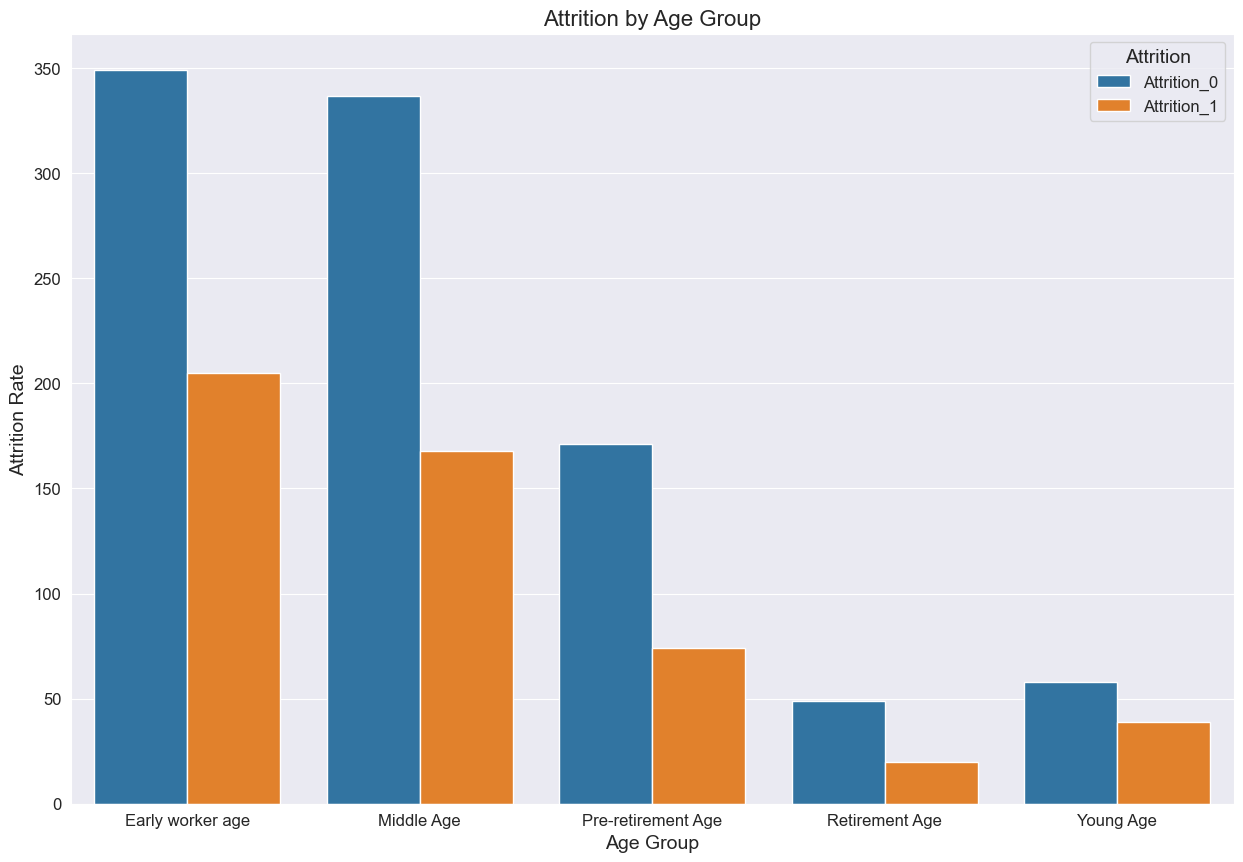

In [41]:
df_age_melted = df_age.melt(id_vars="AgeGroup",
                            value_vars=["Attrition_0", "Attrition_1"],
                            var_name="Attrition",
                            value_name="Value")

# Plot dengan hue
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="AgeGroup", y="Value", hue="Attrition", data=df_age_melted, ax=ax)
ax.set_title("Attrition by Age Group", fontsize=16)
ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Insight
From the analysis, it is observed that employees in the early-career age group and middle-aged group tend to have higher attrition rates compared to other age groups. This indicates that younger employees and those in their mid-career stages might face challenges or dissatisfaction that leads them to leave the organization.

## Bagaimana tingkat attrition bervariasi berdasarkan gender?

In [42]:
df_gender = df_pre.groupby("Gender").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum())
).reset_index()

df_gender

,Gender,Attrition_0,Attrition_1
0,0,394,194
1,1,570,312


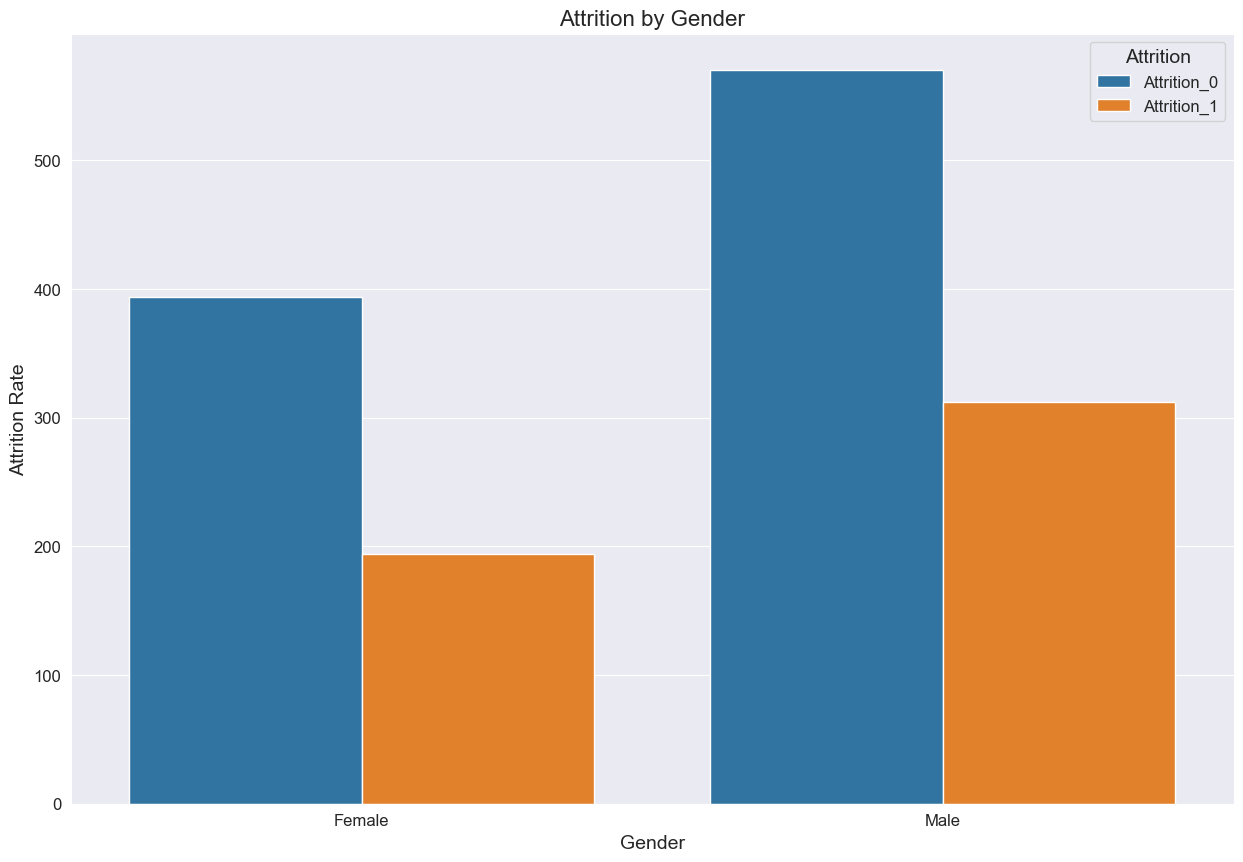

In [43]:
df_gender_melted = df_gender.melt(id_vars="Gender",
                                  value_vars=["Attrition_0", "Attrition_1"],
                                  var_name="Attrition",
                                  value_name="Value")

df_gender_melted.replace({"Gender": {0: "Female", 1: "Male"}}, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Gender", y="Value", hue="Attrition", data=df_gender_melted, ax=ax)
ax.set_title("Attrition by Gender", fontsize=16)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

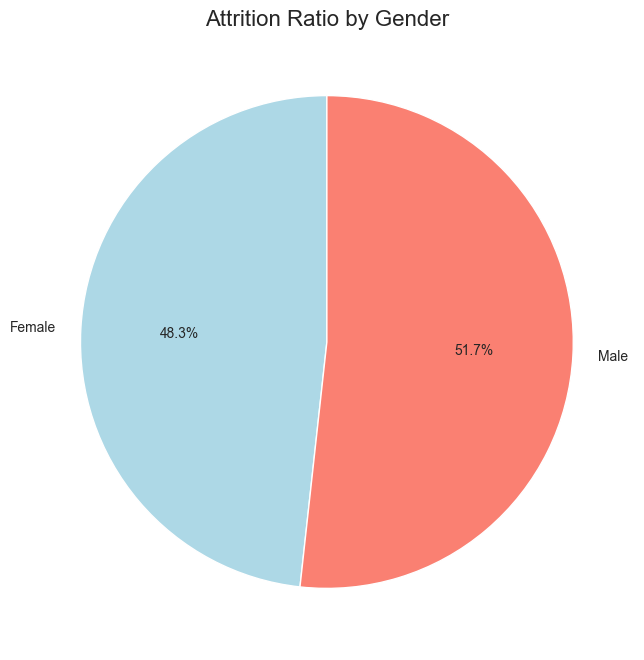

In [70]:
# count of the employees amount and attrition base on gender
df_gender_ratio = df_gender.copy()
df_gender_ratio["Total"] = df_gender_ratio["Attrition_0"] + df_gender_ratio["Attrition_1"]
df_gender_ratio["Attrition_Ratio"] = df_gender_ratio["Attrition_1"] / df_gender_ratio["Total"]

# Mapping gender labels
df_gender_ratio["Gender"] = df_gender_ratio["Gender"].replace({0: "Female", 1: "Male"})

# Visualisasi Rasio Attrition
gender_labels = df_gender_ratio["Gender"]
attrition_ratios = df_gender_ratio["Attrition_Ratio"]

# Pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Gender", fontsize=16)
plt.show()

### Insight
The data shows that male employees have a higher attrition rate compared to female employees. This indicates that male employees may face different challenges or dissatisfaction leading to their departure

## Departemen mana yang memiliki tingkat attrition tertinggi?

In [62]:
df_pre.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.344218,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.475274,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [79]:
df_department = df_pre.groupby("Department").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    Dailyrate=("DailyRate", "mean"),
    Monthlyrate=("MonthlyRate", "mean"),
    YearsAtCompany=("YearsAtCompany", "mean"),
    TotalWorkingYears=("TotalWorkingYears", "mean"),
    OverTime=("OverTime", "mean"),
).reset_index()

df_department


,Department,Attrition_0,Attrition_1,Dailyrate,Monthlyrate,YearsAtCompany,TotalWorkingYears,OverTime
0,0,40,23,751.539683,13492.984127,7.238095,11.555556,0.269841
1,1,645,316,806.851197,14284.865765,6.864724,11.342352,0.281998
2,2,279,167,800.275785,14489.793722,7.284753,11.105381,0.286996


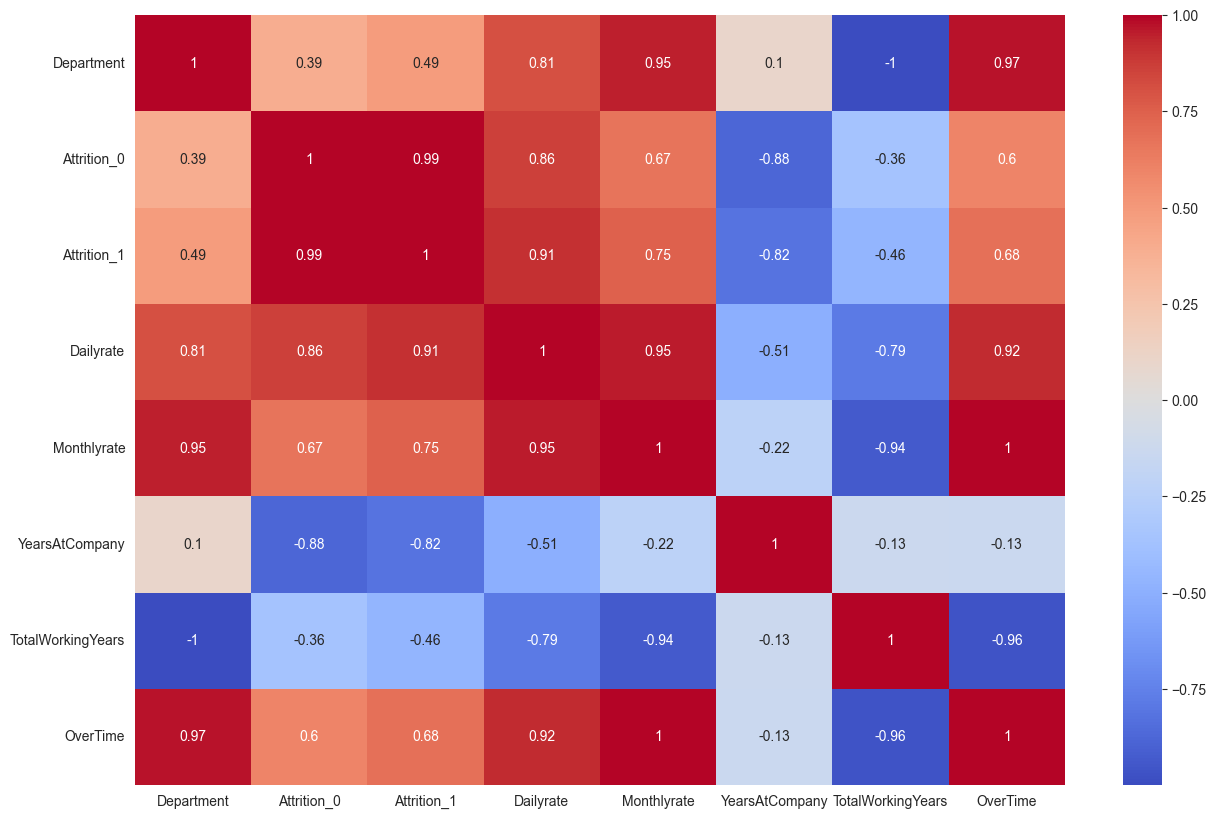

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_department.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
plt.show()

#### Insight
The data shows that there is no significant correlation between Years at Company and Total Working Years with the decision to leave (attrition). This suggests that the length of tenure or overall career experience does not strongly influence employees' decisions to stay or leave the organization.

In [ ]:
df_department.replace({"Department" :{0 : "Human Resource", 1 : "Research & Development", 2 : "sales"}}, inplace=True)
df_department.drop(columns=["YearsAtCompany", "TotalWorkingYears"], inplace=True)

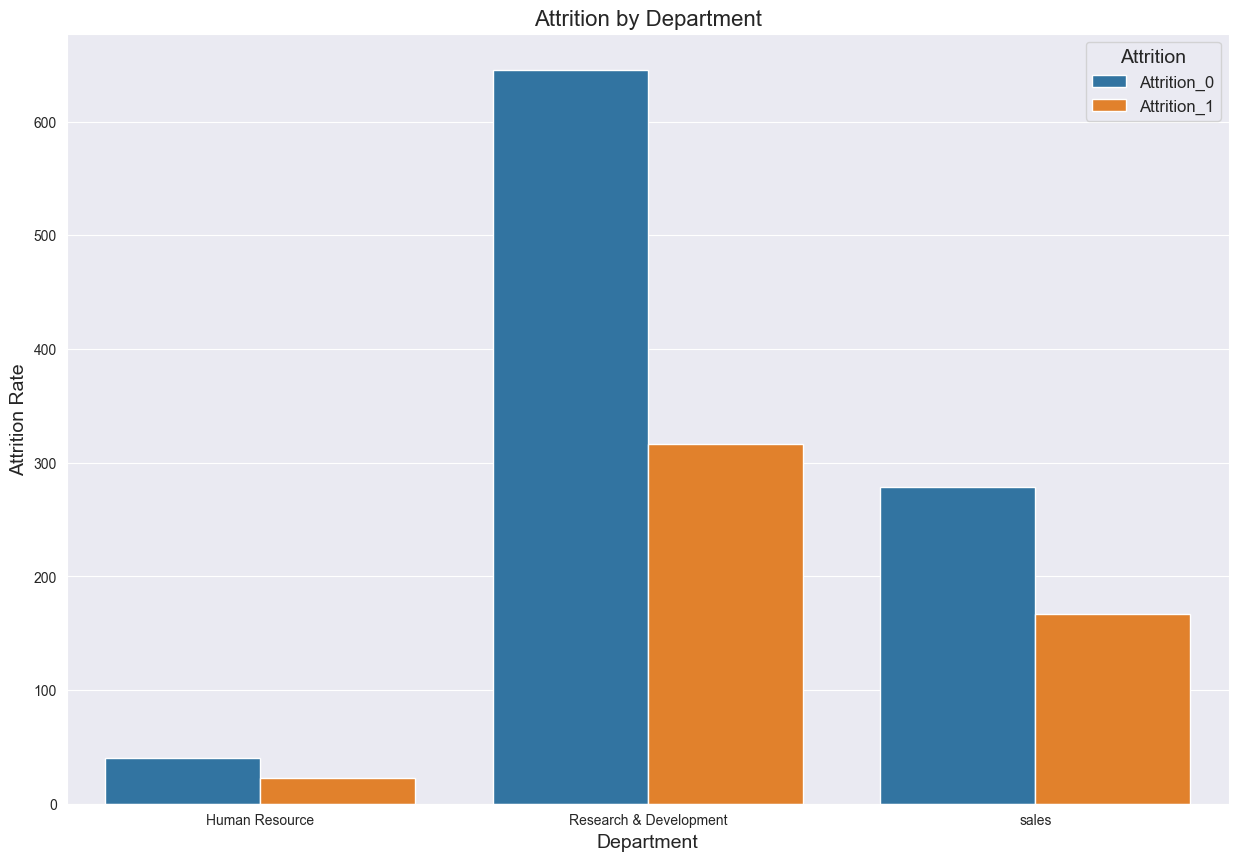

In [85]:
df_department_melted = df_department.melt(id_vars="Department",
                                          value_vars=["Attrition_0", "Attrition_1"],
                                          var_name="Attrition",
                                          value_name="Value")

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Department", y="Value", hue="Attrition", data=df_department_melted, ax=ax)
ax.set_title("Attrition by Department", fontsize=16)
ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
ax.legend(title="Attrition", fontsize=12, title_fontsize=14)
plt.show()

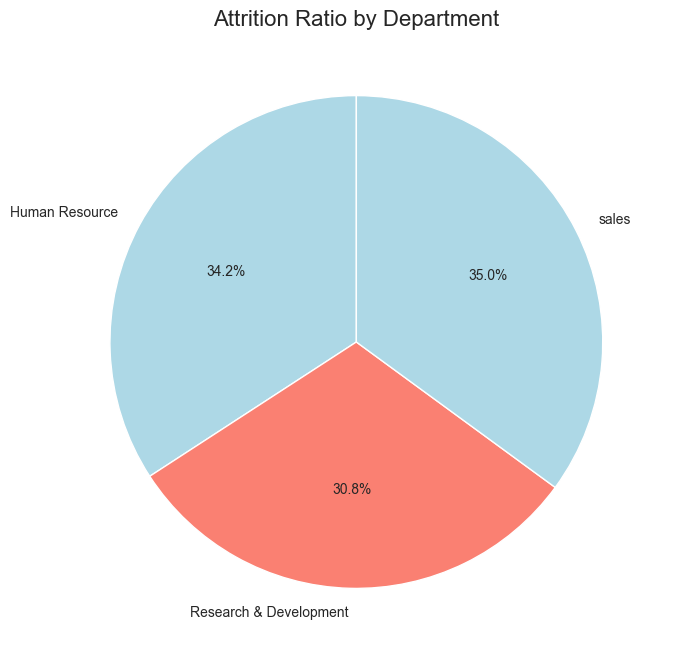

In [86]:
# count of the employees amount each department and attrition base on department
df_department_ratio = df_department.copy()
df_department_ratio["Total"] = df_department_ratio["Attrition_0"] + df_department_ratio["Attrition_1"]
df_department_ratio["Attrition_Ratio"] = df_department_ratio["Attrition_1"] / df_department_ratio["Total"]

# Mapping department
df_department_ratio["Department"] = df_department_ratio["Department"].replace({0: "Human Resource", 1: "Research & Development", 2: "sales"})

# Visualisasi Ratio Attrition
department_labels = df_department_ratio["Department"]
attrition_ratios = df_department_ratio["Attrition_Ratio"]

# Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=department_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Department", fontsize=16)
plt.show()



#### Insight
The data shows that the Research & Development department has slightly lower attrition compared to the Human Resources and Sales departments. However, the differences are relatively small.

## Apakah tingkat attrition lebih tinggi di antara karyawan dengan gaji lebih rendah?

In [95]:
df_pre["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<Axes: >

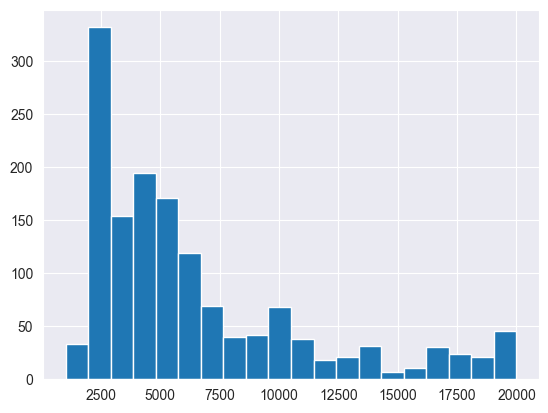

In [109]:
df_pre["MonthlyIncome"].hist(bins=20)

In [118]:
def categorize_salary(salary):
    if salary <= 7500:
        return "Low Salary"
    elif salary <= 15000:
        return "Medium Salary"
    else:
        return "High Salary"


df_pre["SalaryGroup"] = df_pre["MonthlyIncome"].apply(categorize_salary)
df_salary_grouped = df_pre.groupby("SalaryGroup").agg(
    Attrition_0=("Attrition", lambda x: (x == 0).sum()),
    Attrition_1=("Attrition", lambda x: (x == 1).sum()),
    TotalWorkingYears=("TotalWorkingYears", "mean"),
).reset_index()

df_salary_grouped

,SalaryGroup,Attrition_0,Attrition_1,TotalWorkingYears
0,High Salary,97,36,25.601504
1,Low Salary,678,381,8.200189
2,Medium Salary,189,89,16.158273


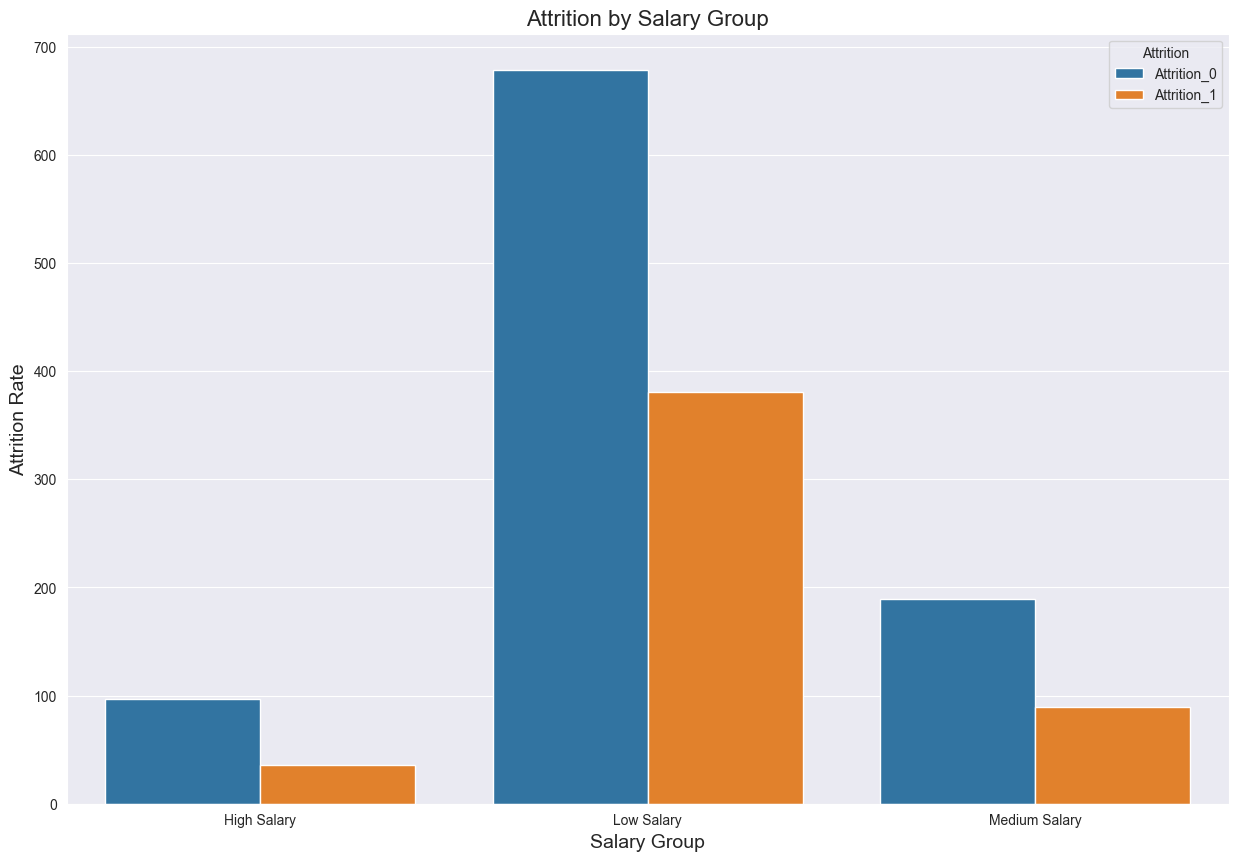

In [124]:
df_salary_melted = df_salary_grouped.melt(id_vars="SalaryGroup",
                                          value_vars=["Attrition_0", "Attrition_1"],
                                          var_name="Attrition",
                                          value_name="Value")

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="SalaryGroup", y="Value", hue="Attrition", data=df_salary_melted, ax=ax)
ax.set_title("Attrition by Salary Group", fontsize=16)
ax.set_xlabel("Salary Group", fontsize=14)
ax.set_ylabel("Attrition Rate", fontsize=14)
plt.show()

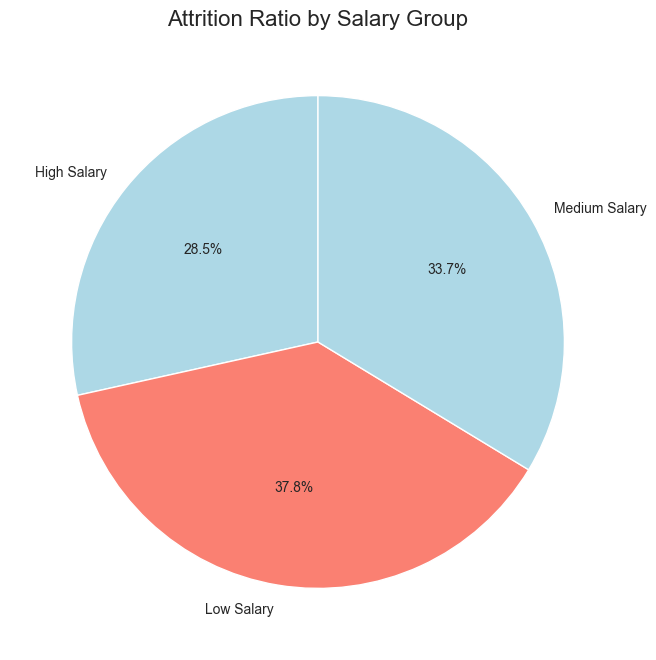

In [126]:
# Count of group salary and attrition base on group salary
df_salary_ratio = df_salary_grouped.copy()
df_salary_ratio["Total"] = df_salary_ratio["Attrition_0"] + df_salary_ratio["Attrition_1"]
df_salary_ratio["Attrition_Ratio"] = df_salary_ratio["Attrition_1"] / df_salary_ratio["Total"]

# Visualisasi ratio attrition
salary_labels = df_salary_ratio["SalaryGroup"]
attrition_ratios = df_salary_ratio["Attrition_Ratio"]

# Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(attrition_ratios, labels=salary_labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
ax.set_title("Attrition Ratio by Salary Group", fontsize=16)
plt.show()

#### Insight
The data indicates that employees with low salaries have a higher likelihood of leaving (attrition) compared to those with medium or high salaries.

# Data preprocessing

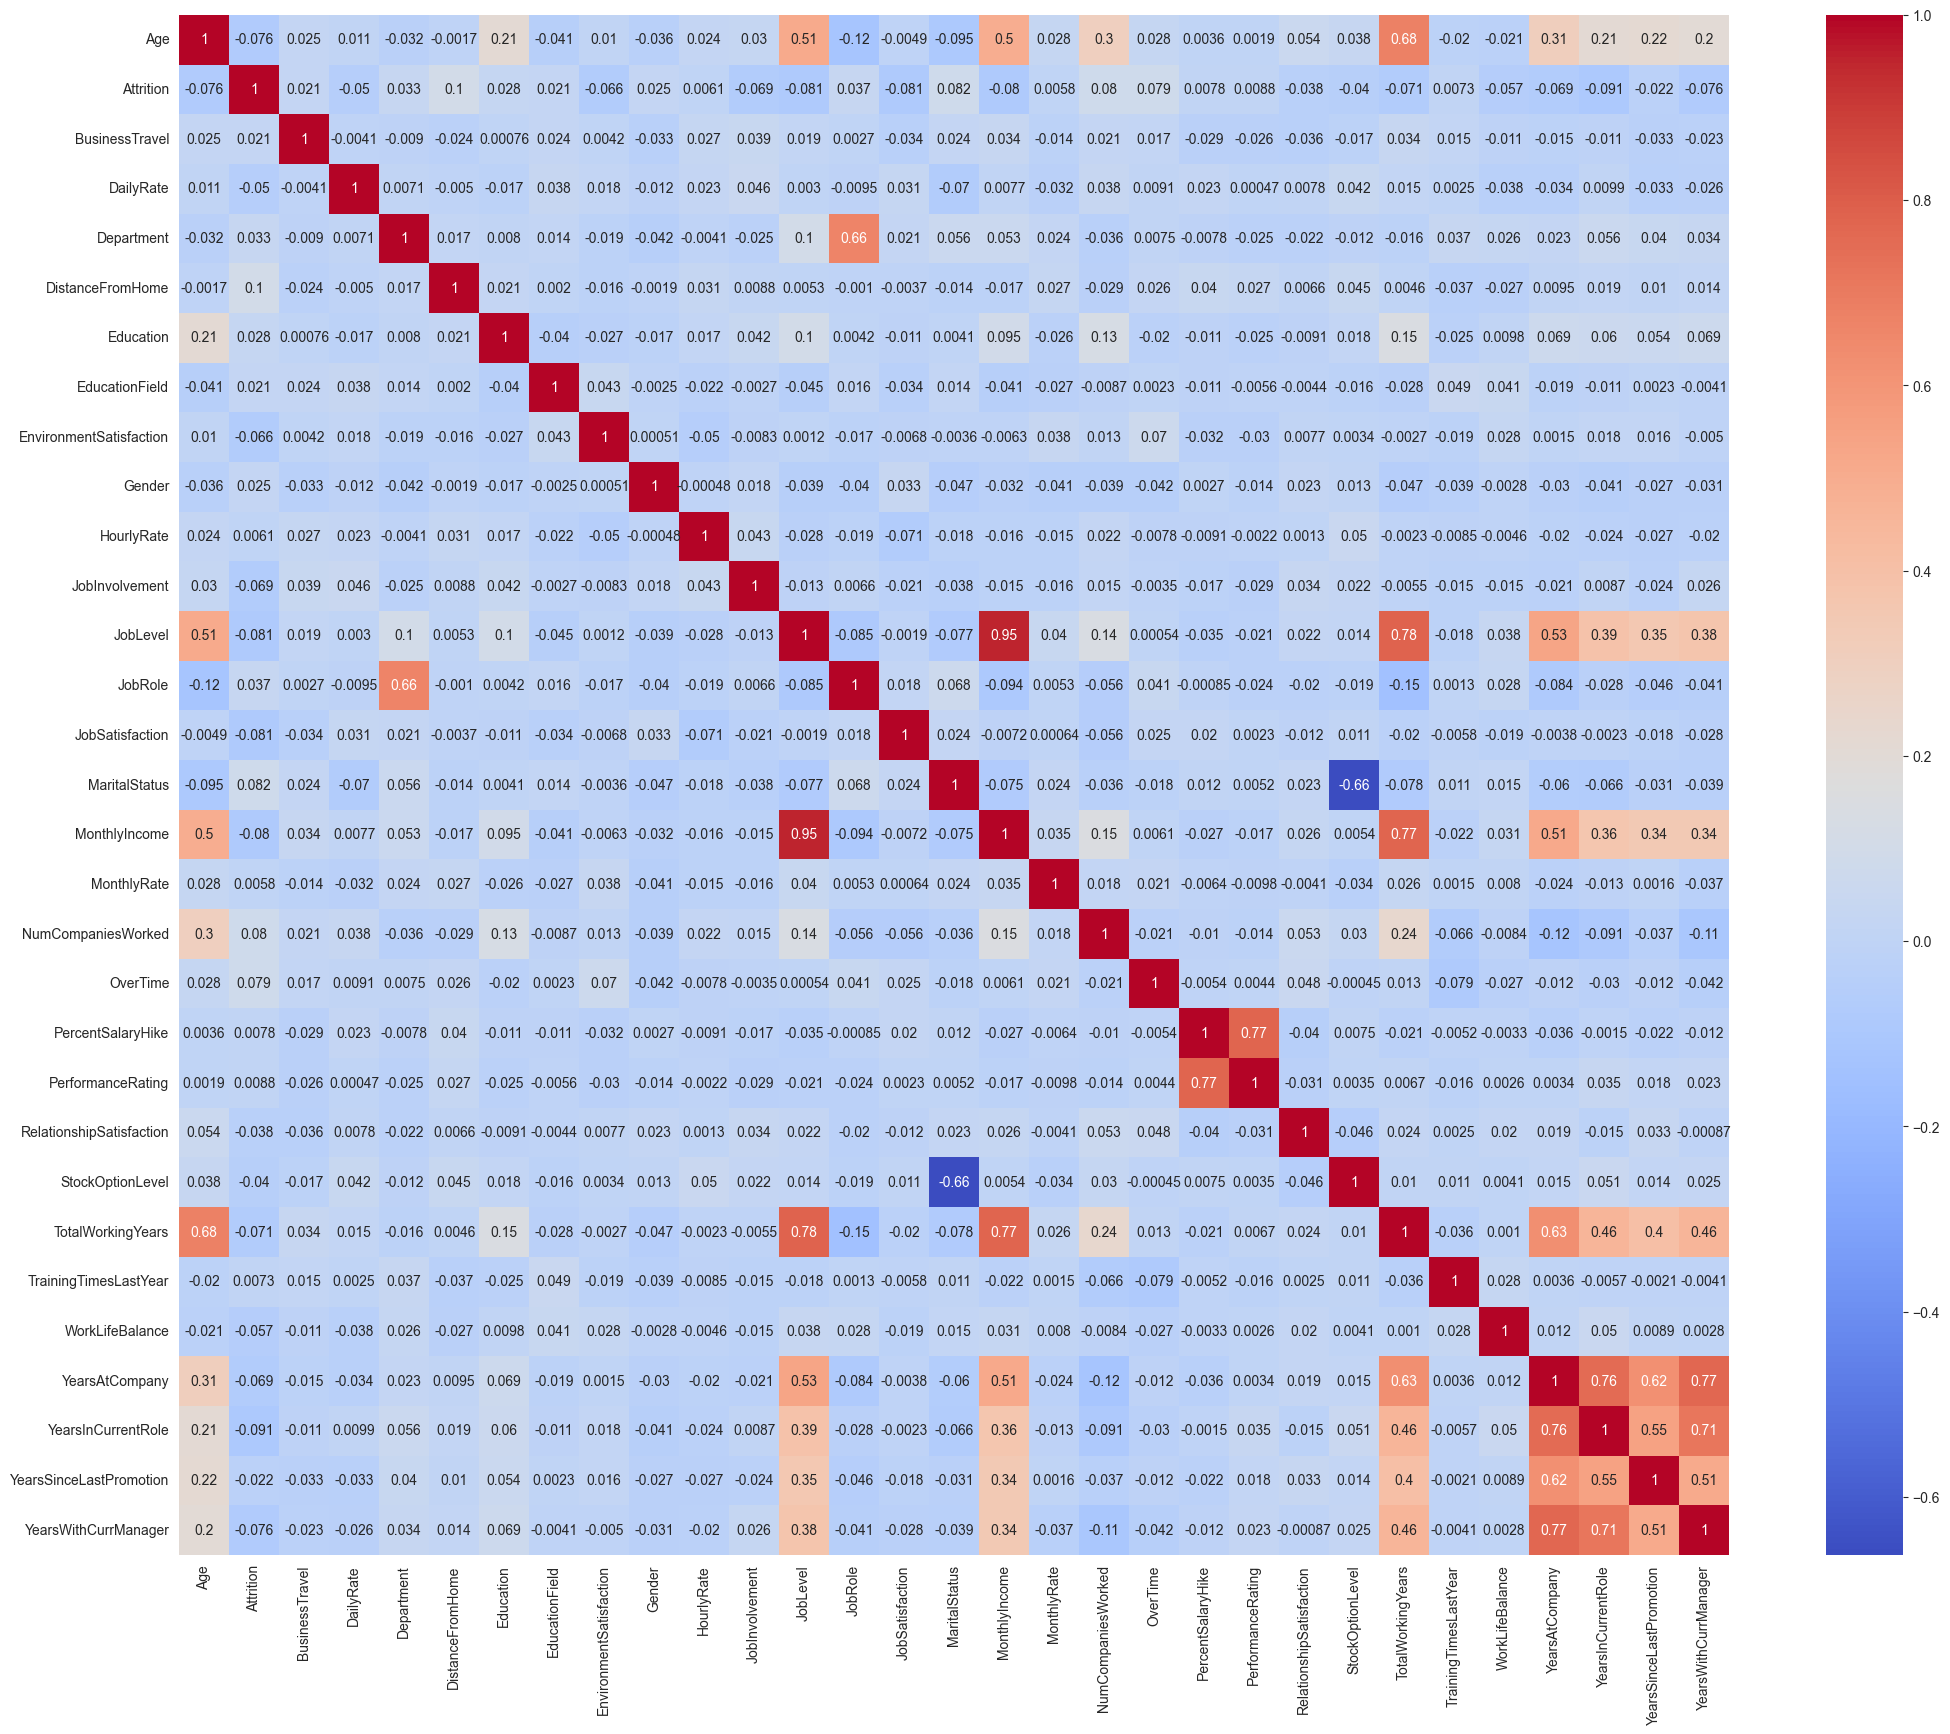

In [47]:
data_corr = df_pre.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

# Modeling

# Evalution